<a href="https://colab.research.google.com/github/piyush02nir/Netflix-Movies-and-TV-Show-Clustering-Unsupervised-/blob/main/Netflix_Movies_and_TV_Show_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Netflix Movies and TV Show Clustering(Unsupervised)

##### **Contribution**    - Piyush Nirwan

# **Project Summary -**

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## In this project, you are required to do

1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features

# ***Let's Begin !***

## Main Libraries used:
• Pandas for data manipulation, aggregation

• Matplotlib and Seaborn for visualization and behavior with respect to the target variable

• NumPy for computationally efficient operations

• Scikit Learn for model training, model optimization, and metrics calculation

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

import scipy.cluster.hierarchy as shc
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from yellowbrick.cluster import KElbowVisualizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import unicodedata
import string
from wordcloud import WordCloud, STOPWORDS 
import missingno as msno 

from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
#setting the notebook.
pd.options.mode.chained_assignment = None  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Loading

In [3]:
# Mount Drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the data.
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Show Clustering/Data_Source/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
print('------------------------------------Head---------------------------------------\n')
netflix_df.head()            #checking 1st 5 rows of the df

print('\n------------------------------------Tail---------------------------------------\n')
netflix_df.tail()            #checking last 5 rows of the df


------------------------------------Head---------------------------------------


------------------------------------Tail---------------------------------------



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {netflix_df.shape[0]}, Columns: {netflix_df.shape[1]}\n')  


------------------------------------Shape-------------------------------------

Rows: 7787, Columns: 12



### Dataset Information

In [7]:
# Dataset Info
print('------------------------------------Info--------------------------------------\n')
netflix_df.info()

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(netflix_df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


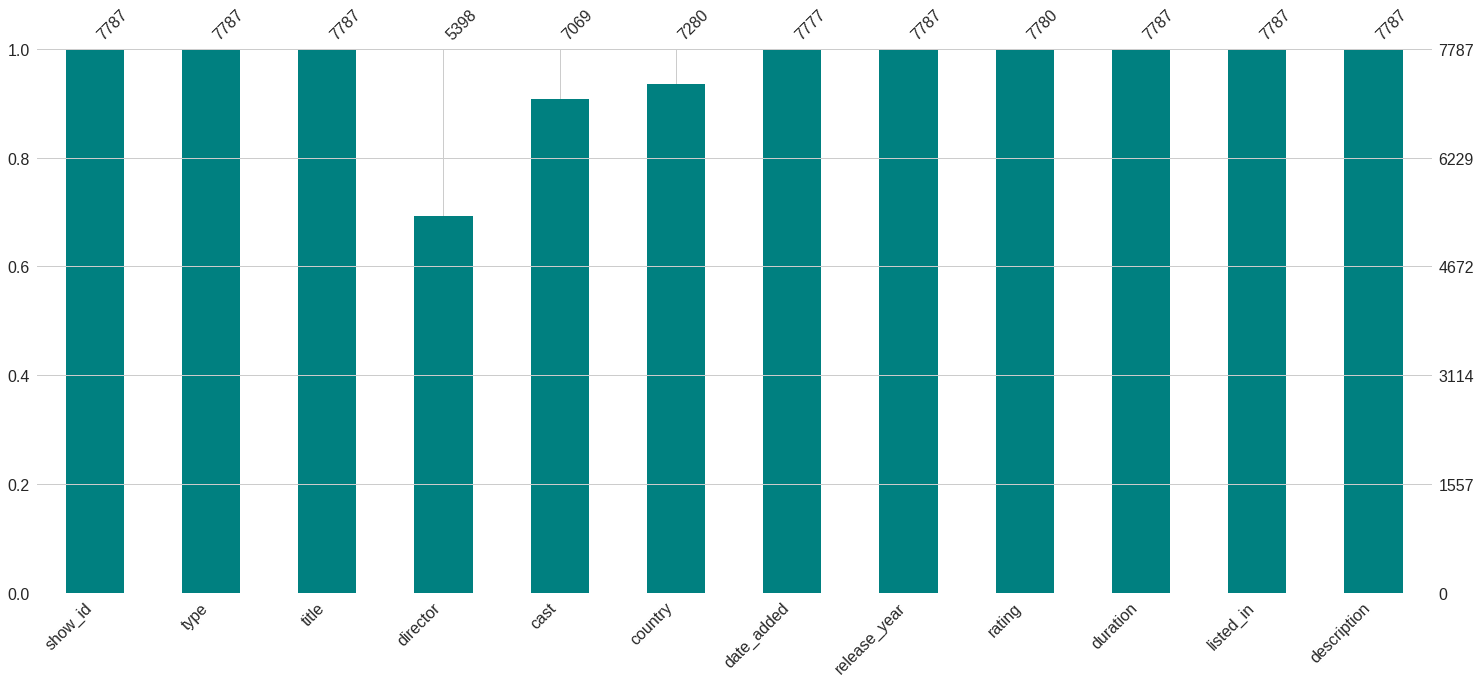

In [10]:
# Visualizing the missing values
msno.bar(netflix_df, color="Teal")

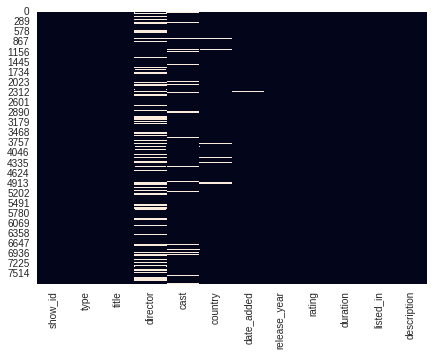

In [11]:
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(netflix_df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?

* The dataset contained about 7787 records, and 12 attributes.
* Apart from release_year which is int64 every other is object dtype.
* There are no duplicate values.
* Director have over 2000 null velues.

## ***2. Understanding Your Variables***

In [12]:
# Choosing the primary country and primary genre to simplify the analysis
netflix_df['country'] = netflix_df['country'].astype('str')
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.split(',')[0])
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0])

In [13]:
# contry in which a movie was produced
netflix_df.country.value_counts()

United States           2883
India                    956
United Kingdom           577
nan                      507
Canada                   259
Japan                    237
France                   196
South Korea              194
Spain                    168
Mexico                   123
Australia                108
Turkey                   106
Egypt                    105
Germany                   92
China                     86
Taiwan                    82
Brazil                    79
Hong Kong                 77
Indonesia                 76
Philippines               75
Nigeria                   71
Argentina                 68
Thailand                  61
Italy                     59
Colombia                  36
South Africa              35
Denmark                   30
Singapore                 28
Ireland                   26
Poland                    26
Netherlands               25
Malaysia                  23
Pakistan                  22
Chile                     21
Norway        

In [14]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7787,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,82,1565,NaN,14,216,36,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Dramas,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2883,118,NaN,2863,1608,1384,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

1.  show_id : Unique ID for every Movie / Tv Show
2.  type : Identifier - A Movie or TV Show
3. title : Title of the Movie / Tv Show
4. director : Director of the Movie
5. cast : Actors involved in the movie / show
6. country : Country where the movie / show was produced
7. date_added : Date it was added on Netflix
8. release_year : Actual Releaseyear of the movie / show
9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",netflix_df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 82 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 36 .
No. of unique values in  description is 7769 .


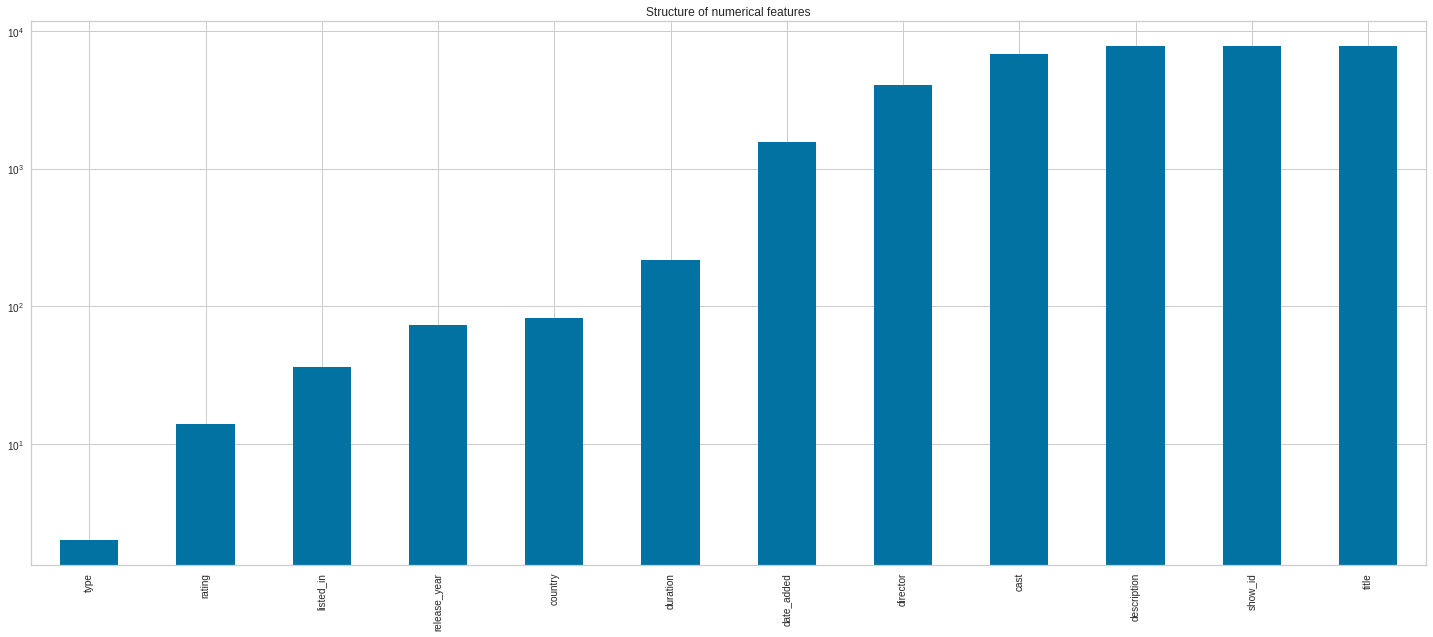

In [17]:
unique_values = netflix_df.nunique().sort_values()
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(25, 10), title="Structure of numerical features")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month        # Compute month.

In [19]:
# Create subsets for tv shows and movies.
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
movies = netflix_df[netflix_df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

### What all manipulations have you done and insights you found?

We made new features to store date, day, month and year seperately.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Content Type On Netflix:

In [20]:
# Chart - 1 visualization code
labels = ['Tv Show', 'Movie']
colors = ['#00DCDC','#008080']

tv_show = netflix_df.type.value_counts()[1]
movie = netflix_df.type.value_counts()[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6, marker=dict(colors=colors))])
fig.update_layout(
    title=dict(text="Type of content watched on Netflix", x=0.5),
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of content.', x=0.5, y=0.5, font_size=20, showarrow=False)],
)

fig.show()


##### 1. Why did you pick the specific chart?

Your data's part-to-whole relationship is illustrated with a pie chart. The area enclosed in a circle with different colours, where different % comparisons are in play, makes it simple to explain percentage comparisons. I therefore employed a pie chart, which enabled me to compare the dependent variable's percentages.

##### 2. What is/are the insight(s) found from the chart?

On Netflix, movies make up 69.1% of the overall material while television shows make up 30.9%.

#### Chart - 2 Countries with the highest number of shows

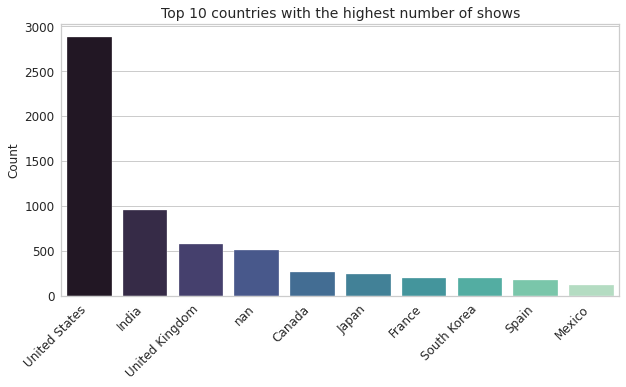

In [21]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x=netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10).index,
            y=netflix_df[~(netflix_df['country']=='Unknown')].country.value_counts().nlargest(10),
            palette='mako')

plt.title('Top 10 countries with the highest number of shows', fontsize=14)
plt.xlabel('')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### 1. Why did you pick the specific chart?

Utilizing bars, a countplot is used to calculate the number of data in each category bin. A count plot can be compared to a histogram across a categorical variable as opposed to a quantitative one.

##### 2. What is/are the insight(s) found from the chart?

The most television series are produced in the United States—almost as many as the following nine counties combined.
India and the United Kingdom are next.

#### Chart - 3 The year in which the movie / tv show was released

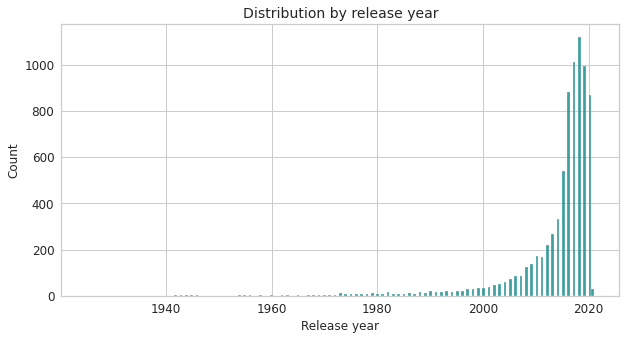

In [22]:
# Chart - 3 visualization code
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.histplot(netflix_df['release_year'], color='teal')

plt.title('Distribution by release year', fontsize=14)
plt.xlabel('Release year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
# Plot growth of the contents over the years.
tv_show = netflix_df[netflix_df["type"] == "TV Show"]
movie = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns = {col : "count", "index" : col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns = {col : "count", "index" : col})
content_2 = content_2.sort_values(col)

trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color='#db0000'))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color='#564d4d'))

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", title_x=0.47, legend=dict(x=0.4, y=1.1, orientation="h"),
                   xaxis_title="Year", yaxis_title="Count")
fig = go.Figure(data, layout=layout)

fig.show()


##### 1. Why did you pick the specific chart?

* One common graphing tool is the histogram. It is employed to present interval-scaled summaries of discrete or continuous data. It is frequently used to conveniently depict the main characteristics of the data distribution. Additionally, it is helpful when working with enormous data sets (greater than 100 observations). It can assist in finding any anomalous observations (outliers) or data gaps.

* A line chart is used to represent data over time or to display the trend of a single data set over time. Line charts are used to see changes in data over time and to see overall trends such as an increase or decrease in data. Line charts are particularly useful when large amounts of data are involved and when it is necessary to make a comparison between several data sets.

##### 2. What is/are the insight(s) found from the chart?

* From the first graph we can see a 'J' shaped curve representing growth in distribution by years.
* Growth in the number of movies on Netflix is much higher than tv shows.
* From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
* The highest number of movies and tv shows got added in 2019 and 2020.
* The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.

#### Chart - 4 Top 10 genres

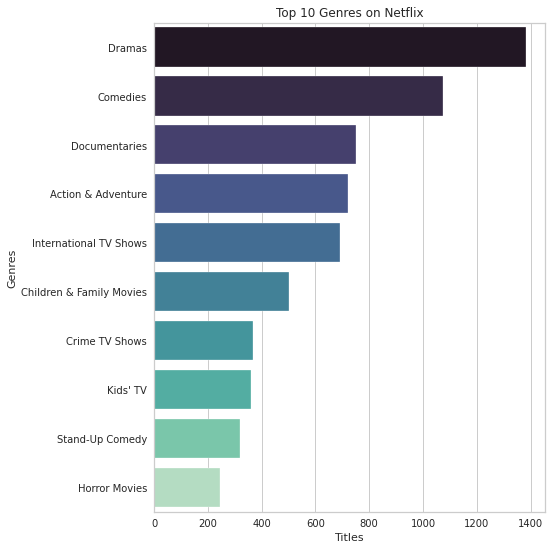

In [24]:
# Chart - 4 visualization code
# Seprating Genres
genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

# ploting graph for top 10 genres
plt.figure(figsize=(7,9))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10],palette = "mako")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.
To see the numbers for different genres i am using bar charts. 

##### 2. What is/are the insight(s) found from the chart?

* From the graph we can see Dramas is the most popular genre.
* Comedies is the second most popular.
* Documentries, Action & Adventure, International TV shows have almost equal numbers which places them in 3rd place.

#### Chart - 5 Age ratings for shows in the dataset

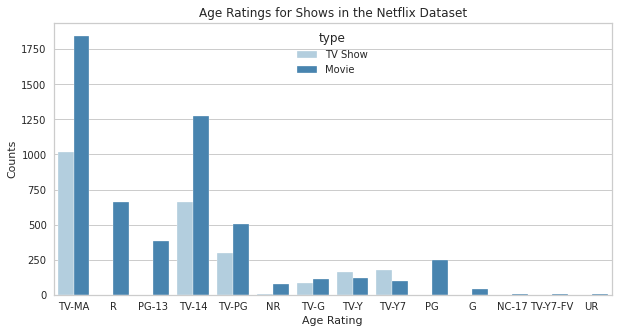

In [25]:
# Chart - 5 visualization code
#Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
g = sns.countplot(x='rating', hue='type', data=netflix_df, palette='Blues')
plt.title('Age Ratings for Shows in the Netflix Dataset')
plt.xlabel('Age Rating')
plt.ylabel('Counts')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

Understanding the Age Rating is important to know whats in demand.

##### 2. What is/are the insight(s) found from the chart?

This graph shows the distribution of different Age Ratings in 2 catogaries.    i.e. Movies and Tv Shows

#### Chart - 6 Top 10 directors

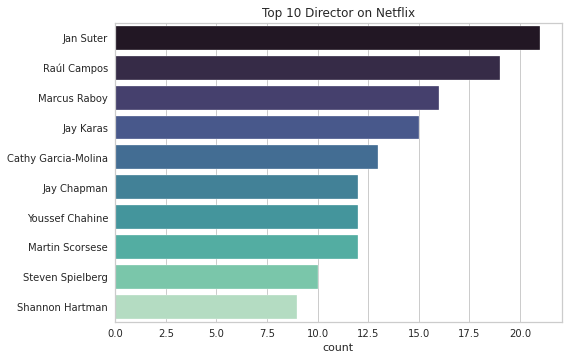

In [26]:
# Chart - 6 visualization code
# Graph for top 10 directors
directors = netflix_df[netflix_df.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='mako')
plt.title('Top 10 Director on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows the Top 10 Directors on Netflix based on number of releases.

#### Chart - 7  Top 10 actors

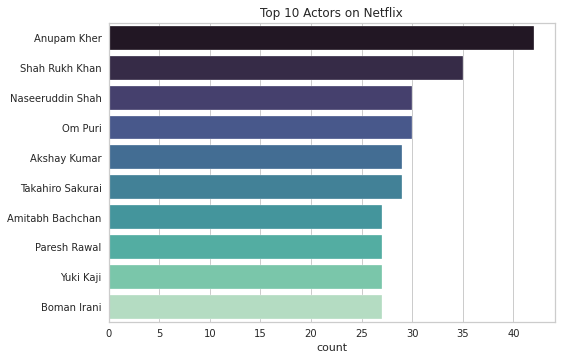

In [27]:
# Chart - 7 visualization code
# Graph for top 10 actors
actor = netflix_df[netflix_df.cast != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='mako')
plt.title('Top 10 Actors on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

The above graph shows the Top 10 Actors on Netflix based on number of releases.

#### Chart - 8 Monthwise content addition

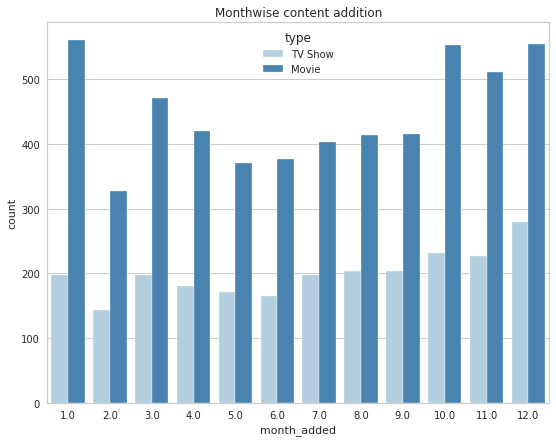

In [28]:
# Chart - 8 visualization code
#Plotting a countplot for getting better insights from monthwise content addition
plt.figure(figsize=(9,7))
sns.countplot(x='month_added',hue='type',palette='Blues',data=netflix_df)
plt.title("Monthwise content addition")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

* From the graph we can see from october to january are the months where most number of movies are added.

* While Tv shows are almost constant through out the year with December being the most active month.

#### Chart - 9 Datewise content addition

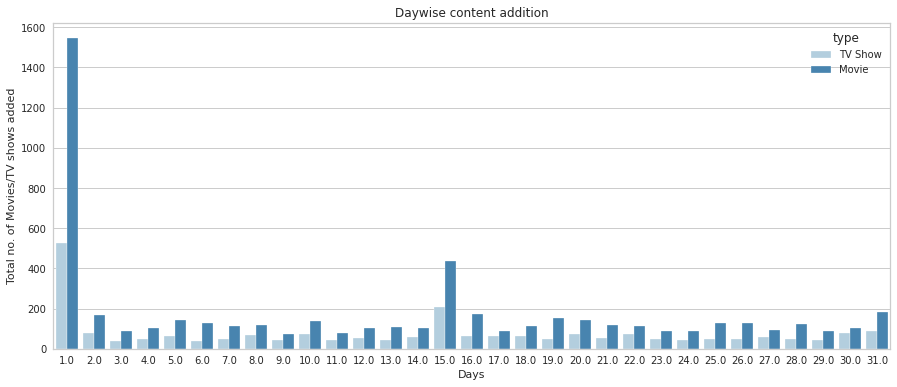

In [29]:
# Chart - 9 visualization code
#Plotting a countplot for getting better insights from datewise content addition
plt.figure(figsize=(15,6))
sns.countplot(x='day_added',hue='type',palette='Blues',data=netflix_df)
plt.xlabel('Days')
plt.ylabel('Total no. of Movies/TV shows added')
plt.title("Daywise content addition")
plt.show()

##### 1. Why did you pick the specific chart?

Countplot is used to visualize the frequency or count of occurrences of a categorical variable. It helps to understand the distribution of the variable by showing the number of observations in each category. The countplot is a bar graph, with the height of each bar representing the count of observations in each category. It provides a simple and easy way to compare the count of observations in different categories.

##### 2. What is/are the insight(s) found from the chart?

* Most of the releases are on the first day of the month.

* 15th day of the month being the 2nd most active day.

#### Chart - 10 Seasons in each TV show

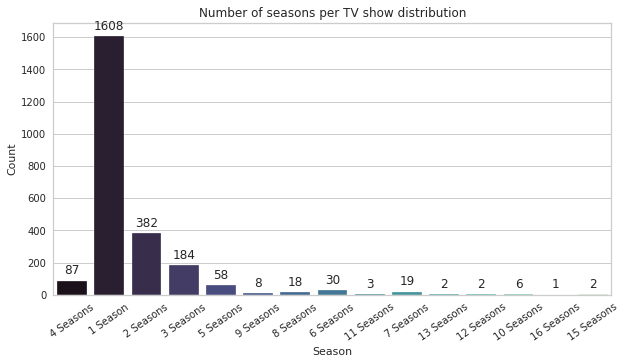

In [30]:
# Chart - 10 visualization code
# Seasons in each TV show

plt.figure(figsize=(10,5))

# Filter the dataframe to only include TV shows
tv_shows_df = netflix_df[netflix_df['type']=='TV Show']

p = sns.countplot(x='duration',palette='mako',data=tv_shows_df)
plt.title('Number of seasons per TV show distribution')

# Add count annotations to each bar
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('Season')
plt.ylabel('Count')
# Tilt the x-axis labels
plt.xticks(rotation=35)
plt.show()


##### 1. Why did you pick the specific chart?

Bar plots are used to compare the values of a categorical variable across different categories. The height of each bar represents the value of the variable for each category, making it easy to compare the values across categories. Bar plots can be used to visualize the distribution of a continuous or discrete variable, as well as the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

* 1608 Tv series have 1 season.
* 382 TV series had a follow up season.
* After season 5 the number of TV Series with follow up season are in single digits.

#### Chart - 11 Word cloud

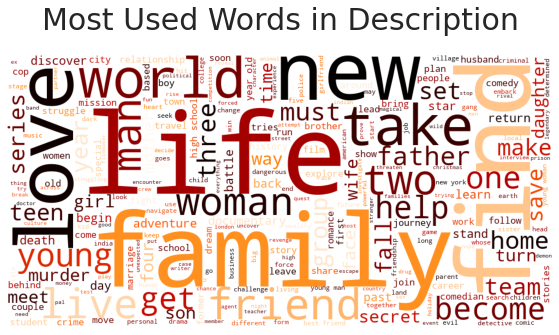

In [31]:
# Chart - 11 visualization code
# Create a string to store all the words.

# Get the stopwords
stop_words = set(stopwords.words("english"))

# Create a string to store all the words.
all_words = ''

# Iterate through the description column of the dataframe.
for description in netflix_df.description:
    # Convert the description to a string
    description = str(description)
    
    # Split the description into tokens
    tokens = description.split()
    
    # Convert each token to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    # Join the tokens back into a string and add it to `all_words`
    all_words += " ".join(tokens) + " "

# Generate the wordcloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stop_words,
                      min_font_size=10,
                      max_words=1000,
                      colormap='gist_heat').generate(all_words)

# Plot the wordcloud
plt.figure(figsize=(8, 8))
plt.title('Most Used Words in Description', fontsize=30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


##### 1. Why did you pick the specific chart?

A word cloud, also known as a tag cloud, is a visual representation of the frequency of words in a text dataset. The size of each word in the cloud is proportional to its frequency of occurrence in the text, allowing the most frequent words to be easily identified. Word clouds provide a quick and simple way to gain insights into the content and structure of a text dataset, and to identify the most important or relevant words. 

It is good to understand what keywords are used in the description.

##### 2. What is/are the insight(s) found from the chart?

* Life,Find,Family are the 3 most used words.
* Followed by new,world,friend,take.

#### Chart - 12 Duration of Movies/Tv shows

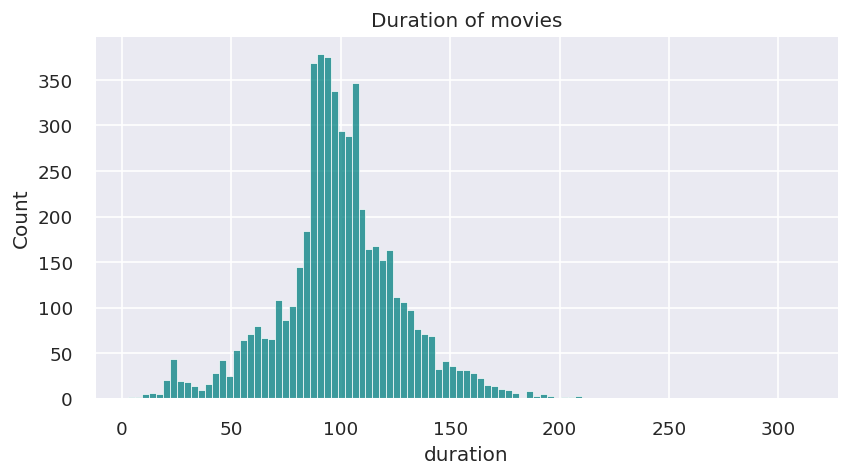

In [32]:
# Chart - 12 visualization code
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='teal')
plt.title('Duration of movies')
plt.show()

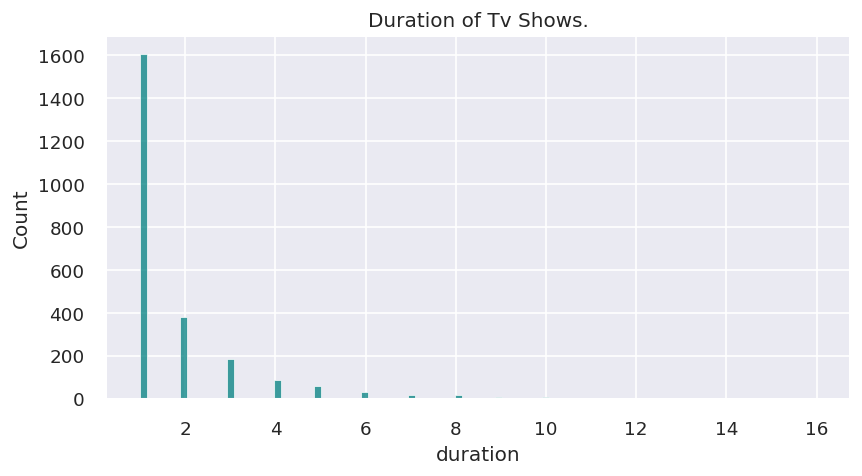

In [33]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='teal')
plt.title('Duration of Tv Shows.')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a type of bar plot that represents the distribution of a continuous variable. It shows the frequency of occurrences of values within specified ranges or "bins". The height of each bar represents the number of observations that fall within the corresponding bin. The use of histograms allows us to see the shape of the distribution of the data, and to identify any patterns, skewness, or outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

* Duration of most movies is in between 80 to 120 minutes.
* There are few movies with runtime more than 200 minutes.

#### Chart - 13 Most used words in title

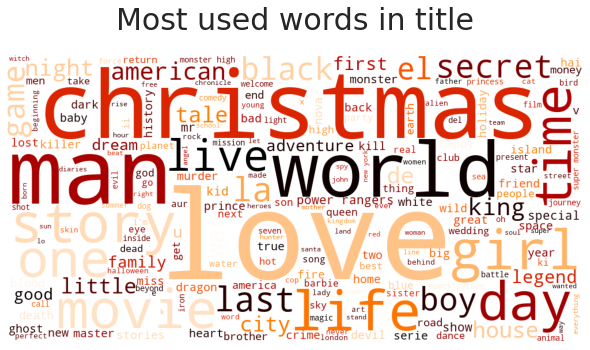

In [34]:
# Chart - 13 visualization code
# iterate through the column.
comment_words = ''
for val in netflix_df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = set(nltk.corpus.stopwords.words('english')),
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

A word cloud, also known as a tag cloud, is a visual representation of the frequency of words in a text dataset. The size of each word in the cloud is proportional to its frequency of occurrence in the text, allowing the most frequent words to be easily identified. Word clouds provide a quick and simple way to gain insights into the content and structure of a text dataset, and to identify the most important or relevant words.

##### 2. What is/are the insight(s) found from the chart?

* the most used words christmas,world,story and love.
* At second place we have life, last,time and live.

#### Chart - 14 - Correlation Heatmap

In [35]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
netflix_df2 = netflix_df.copy()
netflix_df2['rating'].replace(rating_map, inplace = True)
netflix_df2['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [36]:
netflix_df2['country'] = netflix_df2['country'].astype('|S')

In [37]:
netflix_df2['principal_country'] = netflix_df2['country'].apply(lambda x: x.decode().split(",")[0])
netflix_df2['principal_country'].head()

country_order = netflix_df2['principal_country'].value_counts()[:11].index
content_data = netflix_df2[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
     

netflix_df2['count'] = 1
data = netflix_df2.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

Flix_df_heatmap = netflix_df2.loc[netflix_df2['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,nan
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.364407,0.764228,0.463918,0.797619,0.526863,0.488194,0.318182
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.077990,0.074653,0.171937
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.183709,0.196528,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071057,0.098264,0.005929
Young Adults,0.135135,0.142857,0.557531,0.338983,0.113821,0.365979,0.095238,0.140381,0.142361,0.268775


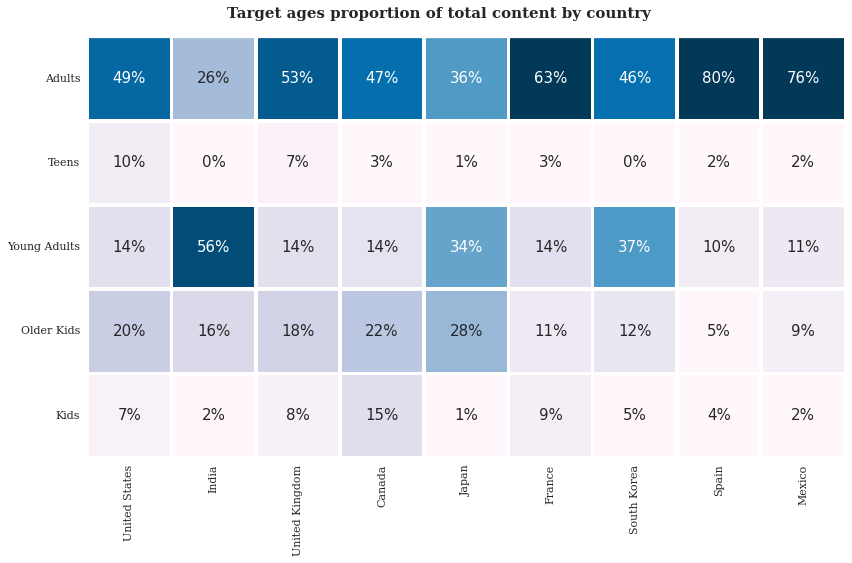

In [38]:
# Chart - 14 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(12, 12))

# Define the countries and ages to be included in the plot
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

# Plot the heatmap
sns.heatmap(Flix_df_heatmap.loc[age_order, country_order], cmap="PuBu", square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='2.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 15})

# Customize the plot
ax.spines['top'].set_visible(True)
fig.text(.76, .765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')   
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', which='both', length=0)

# Improve the layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical representation of the correlation coefficients between multiple variables or features in a dataset. It allows us to quickly and easily visualize the strength and direction of the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

Countries and Age ratings display a broad range of correlation:

* The age rating of Adults shows a huge correlation with almost all countries, specially spain and mexico.
* India being a country of young adults(age range below 30) display a good correlation with the young adult age rating.so do japan and south korea.


#### Chart - 15 - Pair Plot 

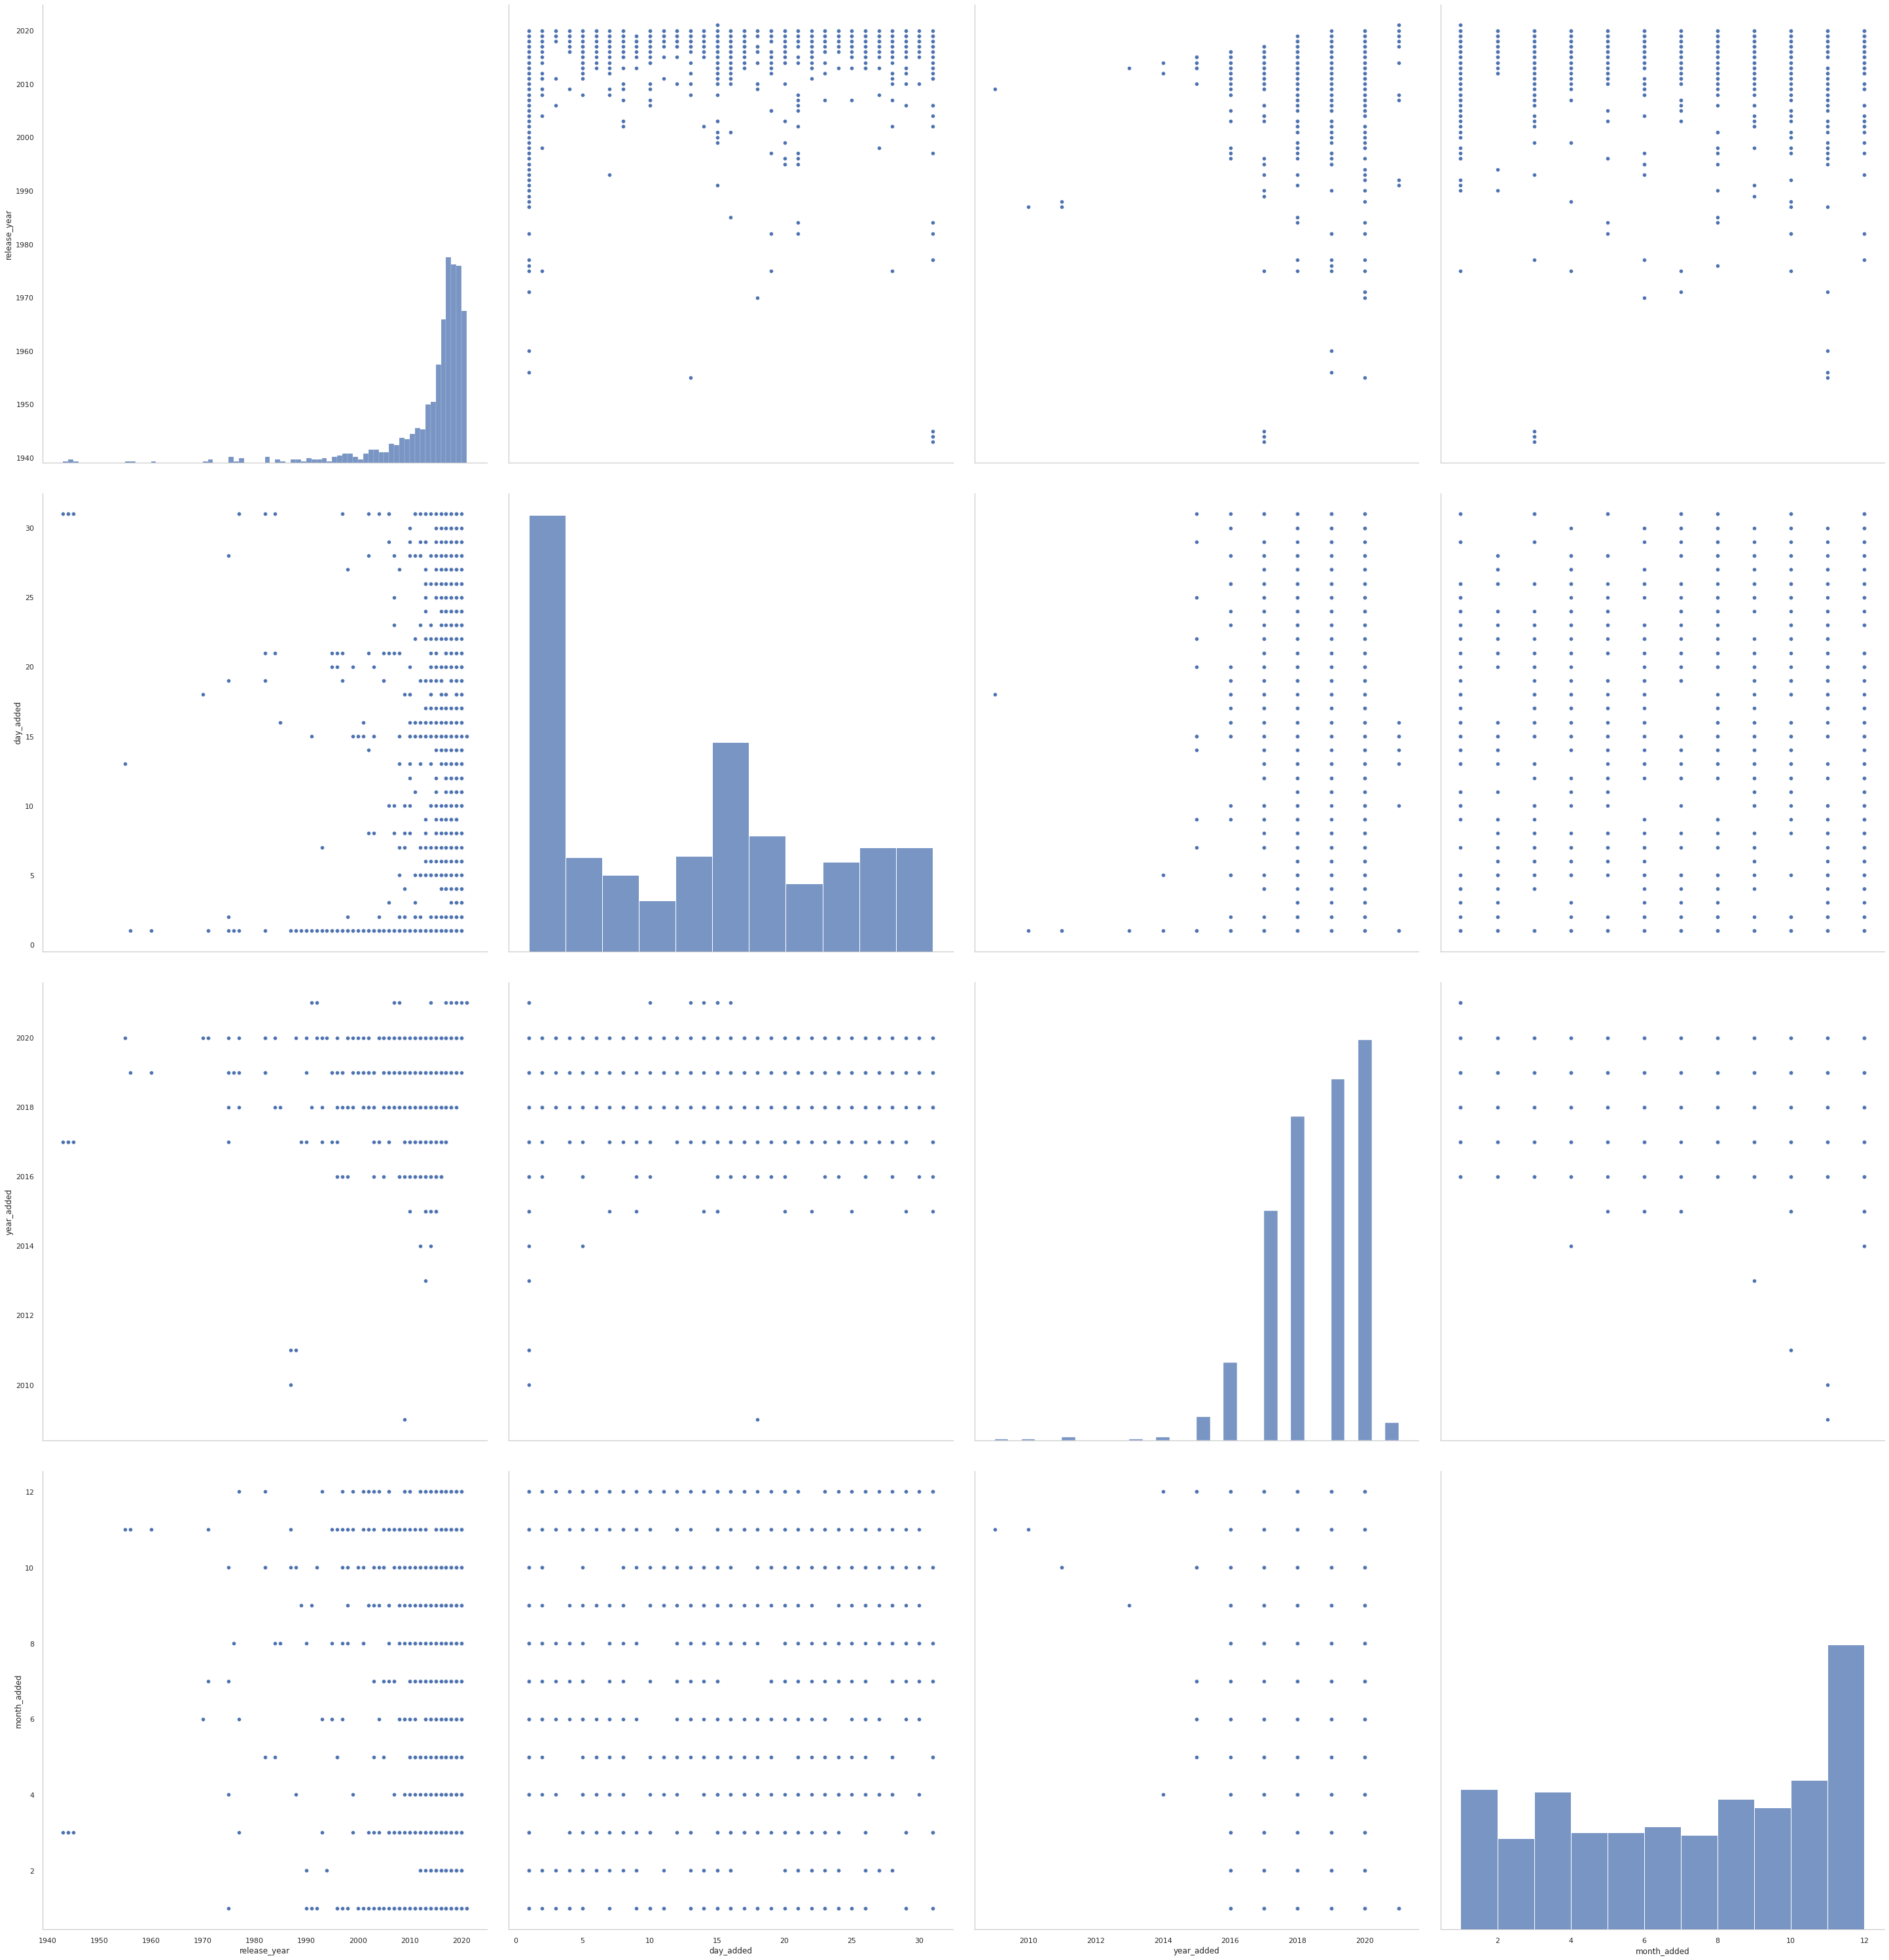

In [39]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False}) #set style of the plot

#plot the pair plot of all the required columns in the dataframe
pp=sns.pairplot(netflix_df.sample(1000))
pp.fig.set_size_inches(45,45)
     

##### 1. Why did you pick the specific chart?

A pair plot, also known as a scatter plot matrix, is a type of plot that displays scatter plots of all pairs of variables in a dataset. It allows us to visualize the relationship between multiple variables at once, making it useful for exploring the structure of a dataset.

##### 2. What is/are the insight(s) found from the chart?

Here in the scatter plot matrix we can see the disstribution of different features.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.   Is Netflix has increasingly focusing on TV rather than movies in recent years?
2.   Content type(Movies/TV series) does not have a significant impact on their run time.
3.   Content type(Movies/TV series) have a significant impact on their ratings.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  year_added has no impact on type of content that gets added to the platform.
* Alternative Hypothesis: year_added has impact on type of content that gets added to the platform.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(netflix_df['type'], netflix_df['year_added'], margins=False)
print(hypo_data)

year_added  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
type                                                                         
Movie            1       2       1      13       3       6      19      58   
TV Show          1       0       0       0       0       5       6      30   

year_added  2016.0  2017.0  2018.0  2019.0  2020.0  2021.0  
type                                                        
Movie          258     864    1255    1497    1312      88  
TV Show        185     361     430     656     697      29  


In [41]:
# making a function as we are going to use this code multiple times
def hypothesis_testing(dataset):
  stat, p, dof, expected = chi2_contingency(dataset)

  print("Statistics: ", stat)
  print("P-Value: ", p)
  print("Degree of Freedom: ", dof)

In [42]:
hypothesis_testing(hypo_data)

Statistics:  75.22727567916088
P-Value:  8.635372719955464e-11
Degree of Freedom:  13


In [43]:
from collections import Counter


In [44]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(netflix_df.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''
 
def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)
     

In [45]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers', 
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers', 
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

fig.show()

##### Which statistical test have you done to obtain P-Value?

I have used Chi-squared as the statistical testing to obtain P-Value and found the result that Null hypothesis isn't True and year_added has no impact on type of content that gets added to the platform.

Therfore, we accept the Alternate Hypothesis here.

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  Content type(Movies/TV series) does not have a significant impact on their run time.
* Alternative Hypothesis: Content type(Movies/TV series) have significant impact on their run time.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [46]:
hypo_data2 = pd.crosstab(netflix_df['type'], netflix_df['duration'], margins=False)
print(hypo_data2)

duration  1 Season  10 Seasons  10 min  100 min  101 min  102 min  103 min  \
type                                                                         
Movie            0           0       1       97       96       98      101   
TV Show       1608           6       0        0        0        0        0   

duration  104 min  105 min  106 min  107 min  108 min  109 min  11 Seasons  \
type                                                                         
Movie          89       91       97       85       74       61           0   
TV Show         0        0        0        0        0        0           3   

duration  11 min  110 min  111 min  112 min  113 min  114 min  115 min  \
type                                                                     
Movie          2       86       61       65       54       45       47   
TV Show        0        0        0        0        0        0        0   

duration  116 min  117 min  118 min  119 min  12 Seasons  12 min  120 min  \


In [47]:
hypothesis_testing(hypo_data2)

Statistics:  7786.999999999999
P-Value:  0.0
Degree of Freedom:  215


In [48]:
# Perform Statistical Test to obtain P-Value
# Create subsets for tv shows and movies.
tv_shows = netflix_df[netflix_df['type'] == 'TV Show']
movies = netflix_df[netflix_df['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

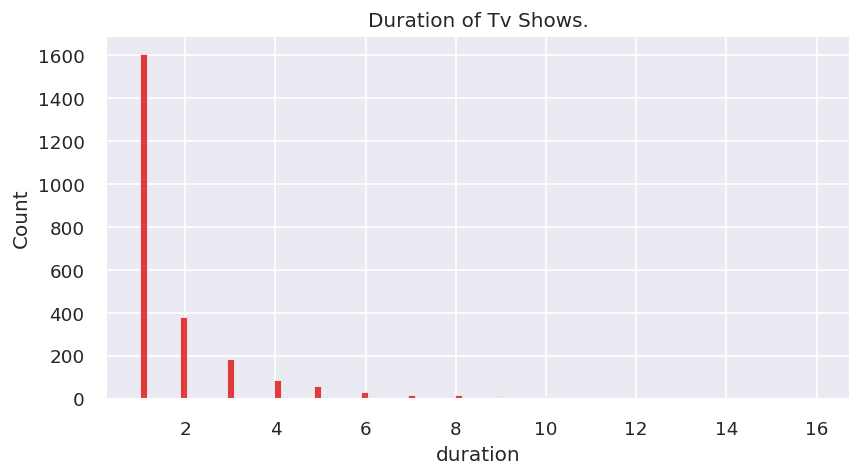

In [49]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()   

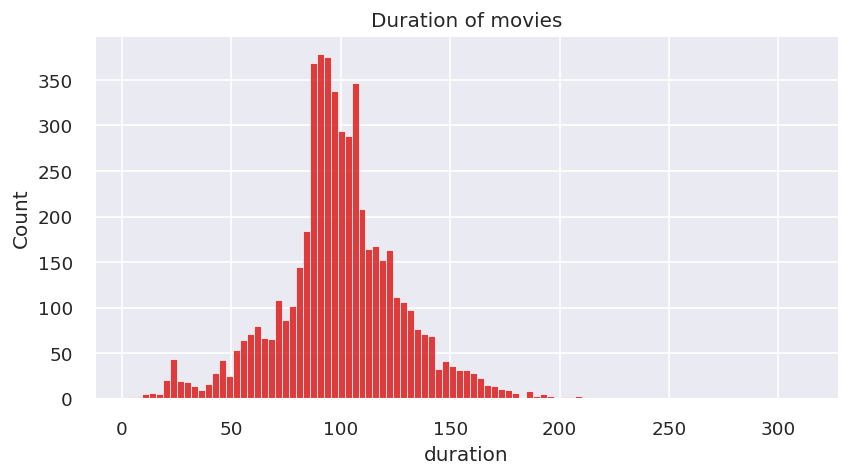

In [50]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

##### Which statistical test have you done to obtain P-Value?

I have used Chi-squared as the statistical testing to obtain P-Value and found the result that Null hypothesis is True and Content type(Movies/TV series) does not have a significant impact on their run time.

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis Testing to check is there is any relation between year_added and type:

* Null Hypothesis:  Content type(Movies/TV series) have a significant impact on their ratings.
* Alternative Hypothesis: Content type(Movies/TV series) does not have a significant impact on their ratings.

Set significance level to 0.05.

#### 2. Perform an appropriate statistical test.

In [51]:
hypo_data3 = pd.crosstab(netflix_df['type'], netflix_df['rating'], margins=False)
print(hypo_data3)

rating    G  NC-17  NR   PG  PG-13    R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
type                                                                       
Movie    39      3  79  247    386  663   1272   111   1845    505   117   
TV Show   0      0   5    0      0    2    659    83   1018    301   163   

rating   TV-Y7  TV-Y7-FV  UR  
type                          
Movie       95         5   5  
TV Show    176         1   0  


In [52]:
hypothesis_testing(hypo_data3)

Statistics:  931.8414205494452
P-Value:  7.496336931137807e-191
Degree of Freedom:  13


In [53]:
# Perform Statistical Test to obtain P-Value
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

In [54]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2 
)
fig.show()

##### Which statistical test have you done to obtain P-Value?

I have used Chi-squared as the statistical testing to obtain P-Value and found the result that Null hypothesis isn't True and Content type(Movies/TV series) does not have a significant impact on their ratings. 

Therfore, we accept the Alternate Hypothesis here.

##### Why did you choose the specific statistical test?

The chi-squared test is a statistical test used to determine if there is a significant relationship between two categorical variables. It is used to compare the observed frequencies in a contingency table to the expected frequencies under the assumption that the two variables are independent.
 
The p-value is then used to determine the significance of the test statistic. If the p-value is less than a significance level (e.g. 0.05), then we reject the null hypothesis that the two variables are independent and conclude that there is a relationship between them.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [55]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

In [56]:
netflix_df.fillna('',inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### We will be using text columns to create clusters for our data.

In [57]:
cluster_df = netflix_df[['title']]
cluster_df['cluster_data'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [58]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


In [59]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)    

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [61]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)  

In [62]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


In [63]:
bag_of_words = cluster_df.cluster_data

### 3. Categorical Encoding

In [64]:
# Encode your categorical columns
cluster_df = netflix_df[['title']]
cluster_df['cluster_data'] = (netflix_df['description'] + ' ' + netflix_df['listed_in'] + ' ' + netflix_df['director'] + ' ' + netflix_df['cast'] + ' ' + netflix_df['country'] + ' ' + netflix_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [65]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


In [66]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words = stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
def stopwords(text):
    '''a function for removing the stopword'''
    if isinstance(text, str):
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)
    else:
        return text

In [68]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 
     

In [69]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
3%,in a futur where the elit inhabit an island pa...
7:19,after a devast earthquak hit mexico citi trap ...


In [70]:
bag_of_words = cluster_df.cluster_data

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [71]:
# Expand Contraction
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [72]:
print(X.shape)

(7777, 20000)


In [73]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

#### 2. Removing Punctuations

In [74]:
# Combining all the clustering attributes into a single column

netflix_df['clustering'] = (netflix_df['director'] + ' ' + 
                                netflix_df['cast'] +' ' + 
                                netflix_df['country'] +' ' + 
                                netflix_df['listed_in'] +' ' + 
                                netflix_df['description'])

In [75]:
# Select the 100 number of clusters for the dataset 
netflix_df['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

In [76]:
# function to remove punctuations
def remove_punctuation(text):
    """
    Remove punctuation marks from the given text.
    """
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [77]:
# Removing punctuation marks
netflix_df['clustering'] = netflix_df['clustering'].apply(remove_punctuation)

In [78]:
# Select the 100 number of clusters for the dataset 
netflix_df['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

#### 3. Removing URLs & Removing words and digits contain digits.

In [79]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words
     

In [80]:
# Remove URLs & Remove words and digits contain digits
# remove non-ascii characters
netflix_df['clustering'] = remove_non_ascii(netflix_df['clustering'])

In [81]:
# Select the 100 number of clusters for the dataset 
netflix_df['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

#### 4. Removing Stopwords & Removing White spaces

In [82]:
# Remove Stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [83]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [84]:
# Removing stop words
netflix_df['clustering'] = netflix_df['clustering'].apply(remove_stopwords)
     

# Select the 100 number of clusters for the dataset 
netflix_df['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

#### 5. Text Normalization

In [85]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [86]:
# Lemmatization
netflix_df['clustering'] = lemmatize_verbs(netflix_df['clustering'])
     

# Select the 100 number of clusters for the dataset 
print(netflix_df['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


##### Which text normalization technique have you used and why?

Lemmatization is a natural language processing technique that involves converting a word to its base or root form, known as the lemma. This process is different from stemming, which involves reducing a word to its root form by removing suffixes, regardless of the actual meaning of the word.

#### 6. Tokenization

In [87]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [88]:
# Tokenization
# Create text column based on dataset
netflix_df['clustering'] = netflix_df['clustering'].apply(lambda x: tokenizer.tokenize(x))
     

# Select the 100 number of Tokenization for the dataset 
print(netflix_df['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


#### 7. Text Vectorization

In [89]:
# clustering tokens saved in a variable
clustering_vectorization = netflix_df['clustering']

In [90]:
# Vectorizing Text
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [91]:
# Dataset Rows & Columns count
x.shape

(7777, 20000)

In [92]:
# convert X into array form for clustering
X = x.toarray()

In [93]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

##### Which text vectorization technique have you used and why?

Tf-idf(Term Frequency-Inverse Document Frequency)

It is a numerical statistic used to reflect how important a word is to a document in a corpus of documents. Tf-idf is commonly used as a weighting factor in information retrieval and text mining.

### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have a problem here with the huge dimensionality so we have reduced the dimensions for effectiveness.

In [94]:
 # using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

In [95]:
# Explained variance for different number of components
# since the code is taking too long to run we are taking a screenshot here.
# plt.figure(figsize=(10,5))
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.title('PCA - Cumulative explained variance vs number of components')
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

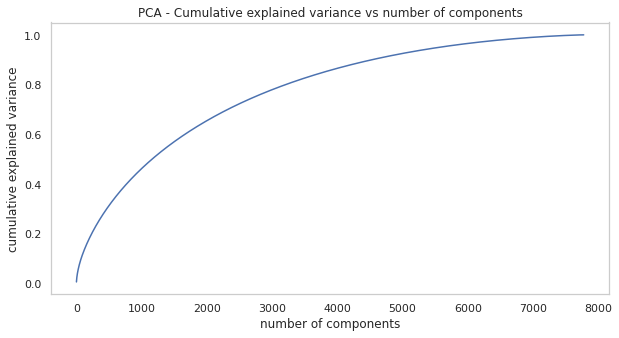

In [96]:
pca_tuned = PCA(n_components=0.95,random_state=40)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(7777, 5751)

In [97]:
X_transformed

array([[ 7.63293179e-02, -3.28448935e-02,  7.81306077e-03, ...,
         7.07343214e-04, -4.16216645e-03,  9.55161138e-05],
       [-2.90192110e-02, -2.59093646e-02,  9.95756162e-03, ...,
         3.72942490e-03,  1.53682891e-03, -1.04060114e-02],
       [-2.26779723e-02, -2.74980780e-02, -8.24213535e-03, ...,
         3.53284816e-03,  5.27882981e-03, -5.59234676e-03],
       ...,
       [ 5.17918445e-02,  2.86463296e-02,  7.39026530e-03, ...,
         7.84138382e-03,  1.54812267e-03, -5.61557606e-03],
       [ 8.86864257e-02, -2.76307252e-02,  2.61165975e-03, ...,
         5.45260804e-03, -8.33475774e-03,  6.43212535e-03],
       [ 5.81169477e-02,  1.13364692e-01, -7.33248212e-02, ...,
         7.04968034e-03,  2.31662021e-02,  1.89089546e-03]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA.

Principal Component Analysis is referred to as PCA. It is a method for reducing dimensionality that is frequently employed in data science and machine learning. PCA reduces the number of dimensions while keeping as much of the original data as feasible in a high-dimensional dataset.

## ***7. ML Model Implementation***

### ML Model - 1 K-means

In [98]:
# ML Model - 1 Implementation

# since we are having a large range of k(4,22) , this code is taking too long to run so we are taking a screenshot
# model = KMeans(random_state=5)
# visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

# visualizer.fit(X_transformed)
# visualizer.show()
     

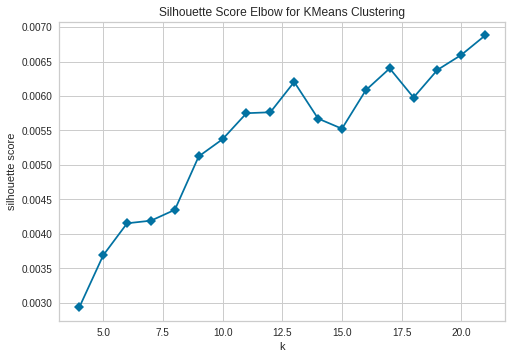

In [99]:
from yellowbrick.cluster import SilhouetteVisualizer
     

from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.002439506480412769


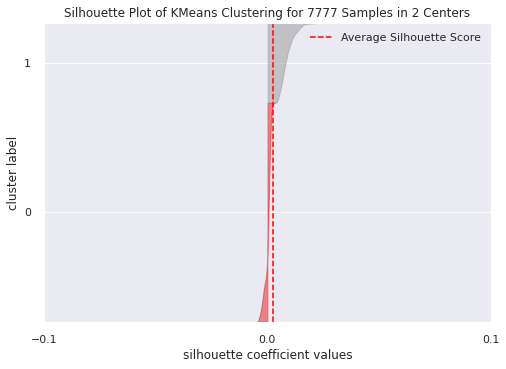

For n_clusters = 3, silhouette score is 0.003502037884727988


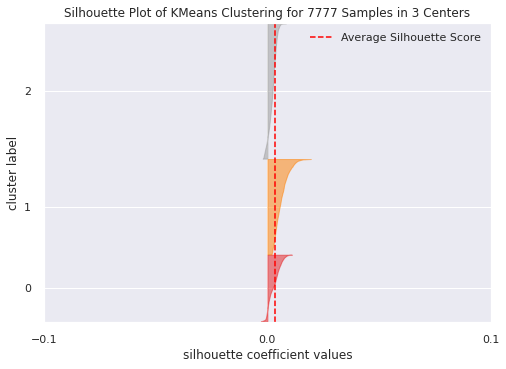

For n_clusters = 4, silhouette score is 0.0024830788099981203


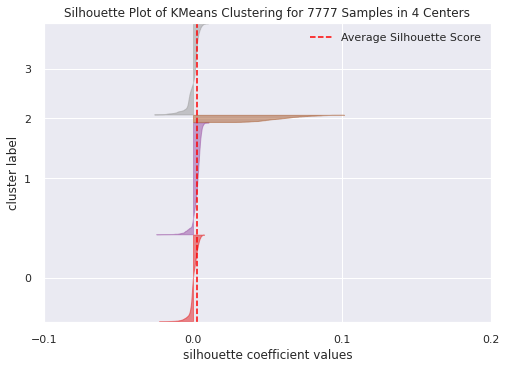

For n_clusters = 5, silhouette score is 0.004794696842721674


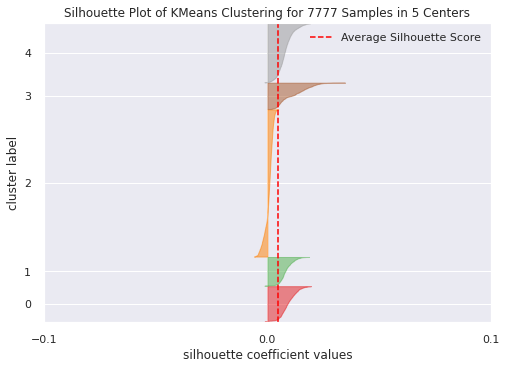

For n_clusters = 6, silhouette score is 0.005352476014724424


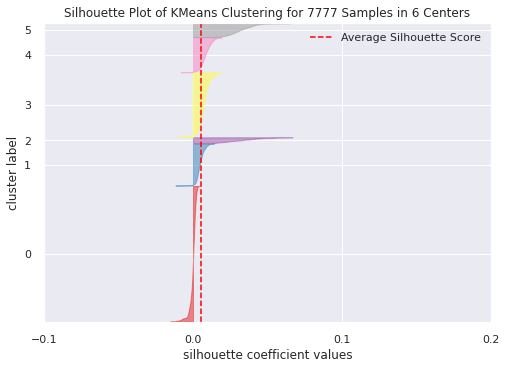

For n_clusters = 7, silhouette score is 0.005464518431201119


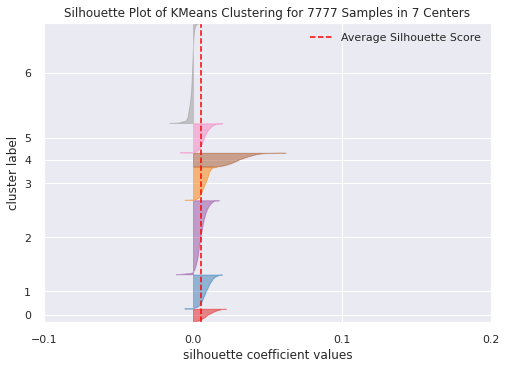

For n_clusters = 8, silhouette score is 0.004979999742837619


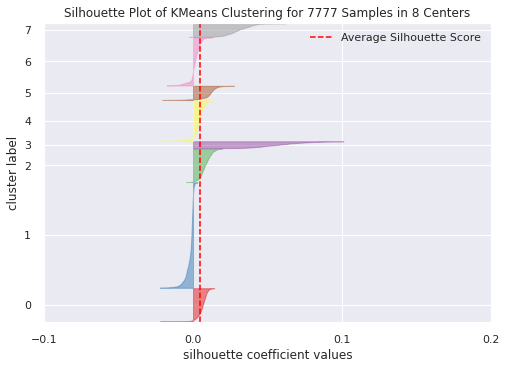

For n_clusters = 9, silhouette score is 0.005481013958768634


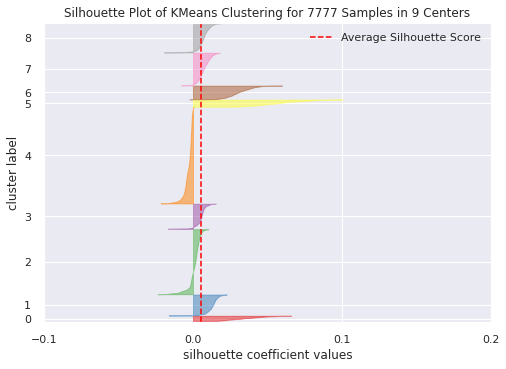

For n_clusters = 10, silhouette score is 0.005716855485299


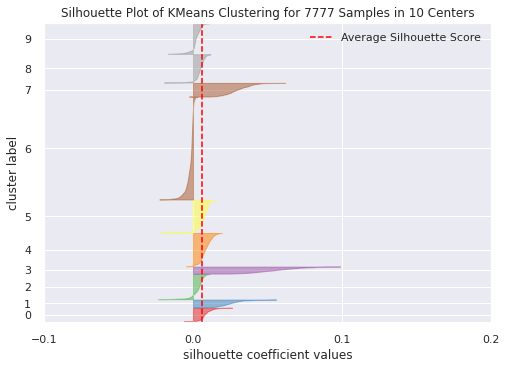

For n_clusters = 11, silhouette score is 0.006302095003402915


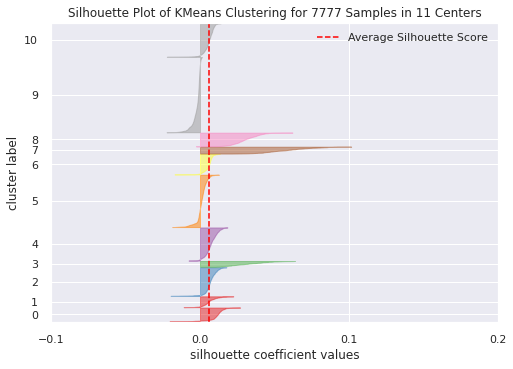

In [100]:
silhouette_score_analysis(12)

### ML MODEL - 2  Hierarchical clustering

In [101]:
# # Building a dendogram to decide on the number of clusters
# plt.figure(figsize=(16, 7))  
# dend = shc.dendrogram(shc.linkage(X_transformed, method='ward'))

# plt.title('Dendrogram', fontsize=20, fontweight='bold')
# plt.xlabel('Netflix Shows', fontsize=16)
# plt.ylabel('Distance', fontsize=16)

# plt.axhline(y=3.8, color='red', linestyle='--', linewidth=2)
# plt.show()

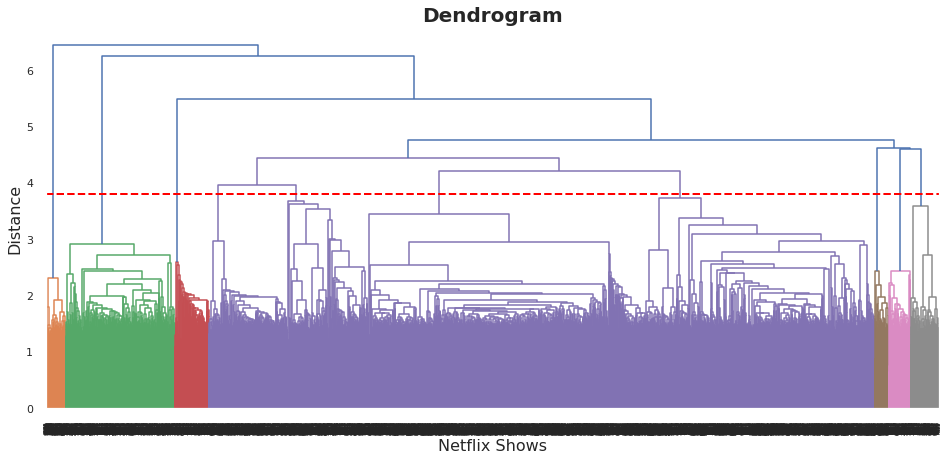

In [102]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X_transformed)

array([ 8, 10,  8, ...,  8,  0,  4])

In [103]:
# Adding a kmeans cluster number attribute
netflix_df['hierarchical_cluster'] = hierarchical.labels_

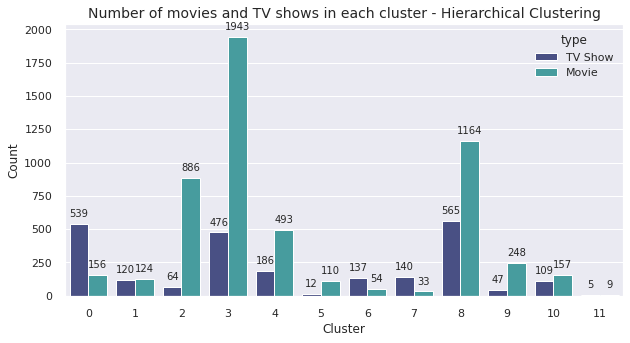

In [104]:
# Number of movies and TV shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster', data=netflix_df, hue='type', palette='mako')
q.set_title('Number of movies and TV shows in each cluster - Hierarchical Clustering', fontsize=14)

# Annotate the bar plot with the count values
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), 
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)

q.set_xlabel('Cluster', fontsize=12)
q.set_ylabel('Count', fontsize=12)

plt.show()


In [105]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in netflix_df[netflix_df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

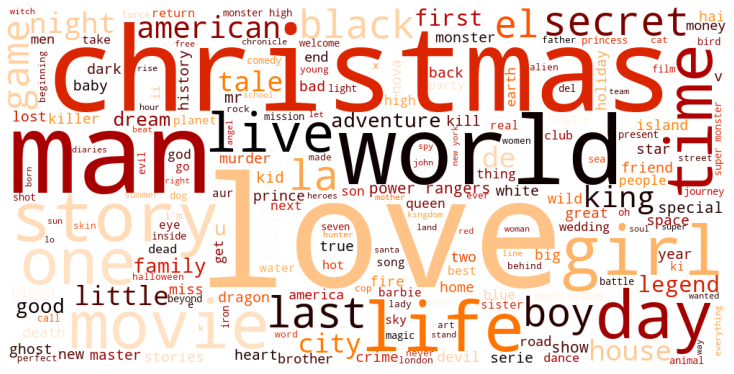

In [106]:
# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### ML Model - 3 Elbow method 

In [107]:
# Visualizing evaluation Metric Score chart

# since we are using max_iter as 300 and n_init as 10 , this code is taking too long to run so we are taking screenshot
# plt.figure(figsize=(10,6), dpi=120)
# wcss = []
# for i in range(1, 22):
#     kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
#     kmeans.fit(X_transformed)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 22), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()
     

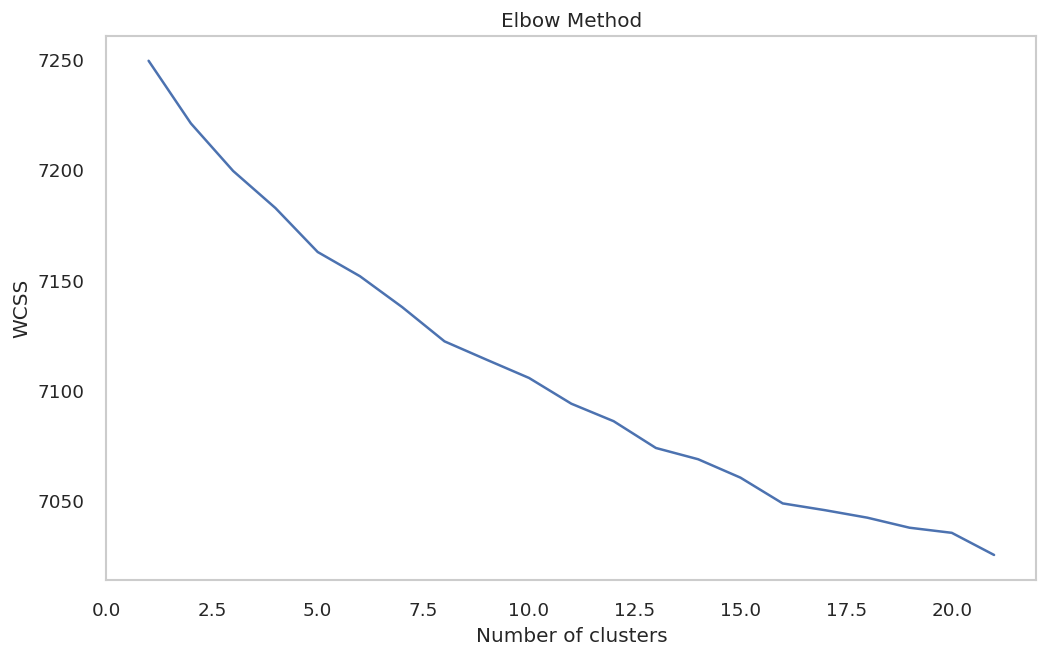

This graph is for 22 clusters

In [108]:
# code is taking too log to run as the range and dpi is high, so we are taking a screenshot here
# plt.figure(figsize=(10,6), dpi=120)
# wcss = []
# for i in range(1, 11):
#     kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=5, random_state=0)
#     kmeans.fit(X_transformed)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

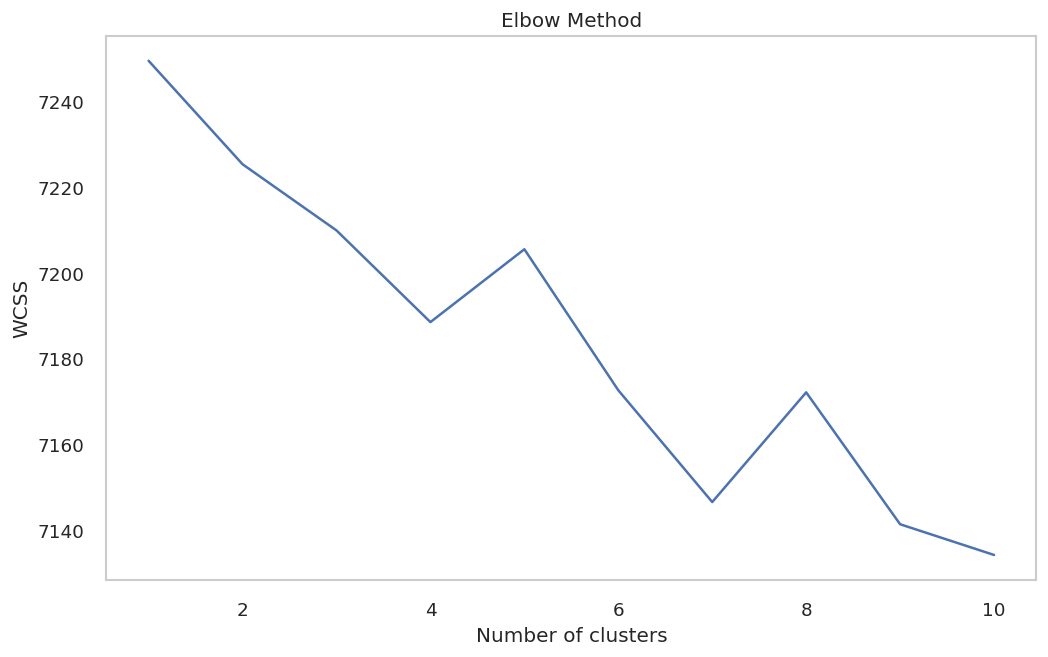

This graph is for 10 clusters

In [109]:
# since the code is taking too long to run we are taking a screenshot
# plt.figure(figsize=(10,6), dpi=120)

# kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
# kmeans.fit(X_transformed)

# #predict the labels of clusters.
# label = kmeans.fit_predict(X_transformed)
# #Getting unique labels
# unique_labels = np.unique(label)
 
# #plotting the results:
# for i in unique_labels:
#     plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
# plt.legend()
# plt.show()

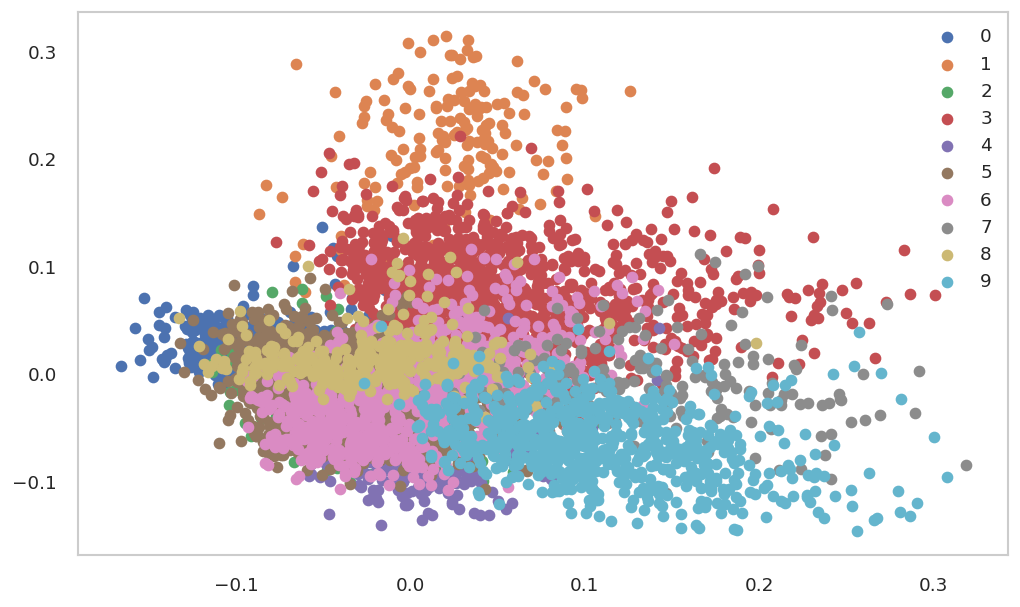

In [110]:
# create an instance of the KMeans class
kmeans = KMeans(n_clusters=10)

# fit the KMeans model to your data
kmeans.fit(X_transformed)

# access the labels_ attribute
labels = kmeans.labels_

In [111]:
if len(kmeans.labels_) < len(netflix_df):
    difference = len(netflix_df) - len(kmeans.labels_)
    kmeans.labels_ = np.pad(kmeans.labels_, (0, difference), 'constant')

if len(kmeans.labels_) > len(netflix_df):
    kmeans.labels_ = kmeans.labels_[:len(netflix_df)]

netflix_df['cluster_number'] = kmeans.labels_

In [112]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [113]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = netflix_df[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

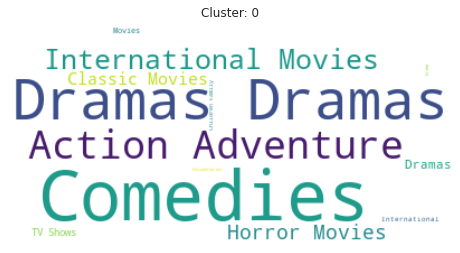

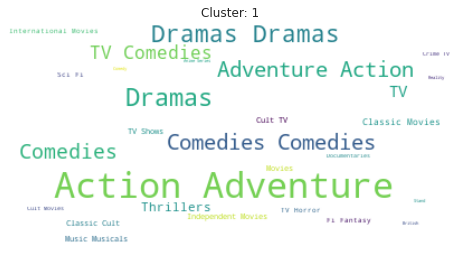

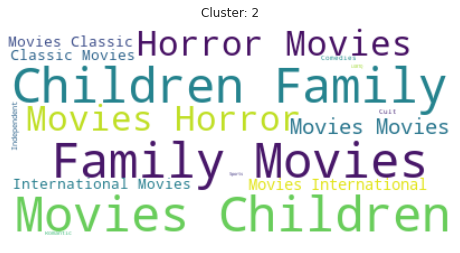

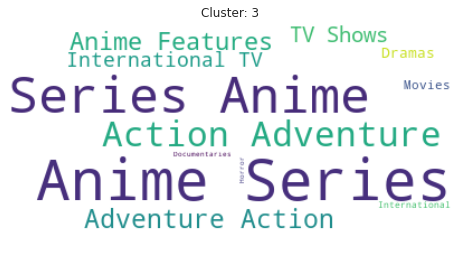

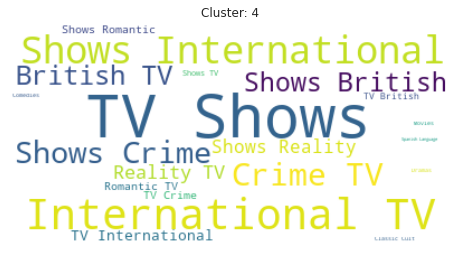

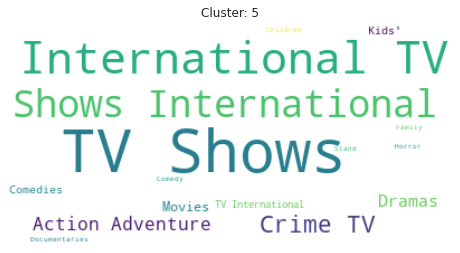

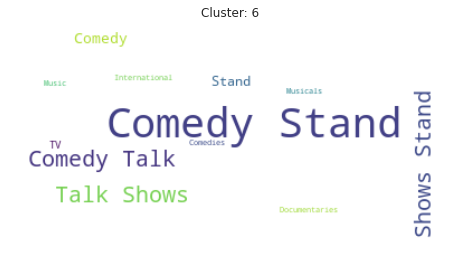

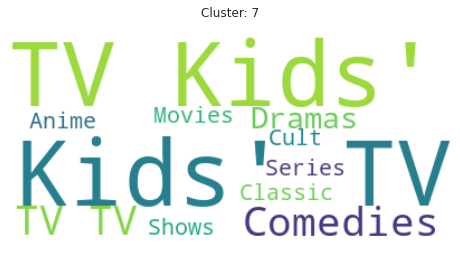

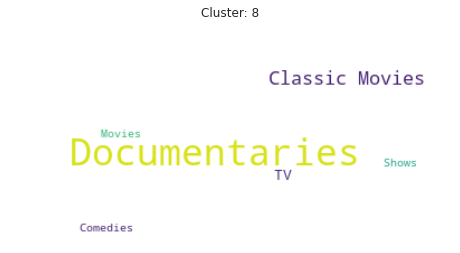

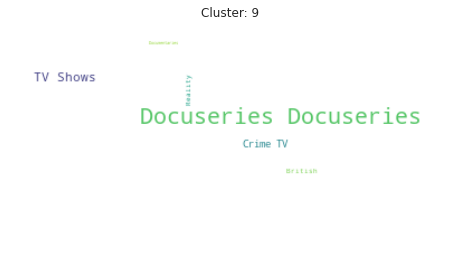

In [114]:
for i in range(10):
  func_select_Category(i,'listed_in')

## Reccomendation:

In [115]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [116]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.0573361 , 0.02298521, ..., 0.02025176, 0.02120665,
        0.02212886],
       [0.0573361 , 1.        , 0.00309344, ..., 0.05274623, 0.        ,
        0.00357761],
       [0.02298521, 0.00309344, 1.        , ..., 0.00218252, 0.00738459,
        0.00731351],
       ...,
       [0.02025176, 0.05274623, 0.00218252, ..., 1.        , 0.01849317,
        0.16197316],
       [0.02120665, 0.        , 0.00738459, ..., 0.01849317, 1.        ,
        0.04285823],
       [0.02212886, 0.00357761, 0.00731351, ..., 0.16197316, 0.04285823,
        1.        ]])

In [117]:
indices = pd.Series(cluster_df.index)
indices[:5]

0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [118]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])
        
    return recommended_movies

In [119]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

,Recommendations
0,Bad Boys II
1,GoldenEye
2,Martin Lawrence Live: Runteldat
3,Tortilla Soup
4,War on Everyone
5,One Strange Rock
6,Slow West
7,The Royal House of Windsor
8,Madam Secretary
9,Powder


In [120]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)
     

,Recommendations
0,13 Reasons Why: Beyond the Reasons
1,Unsolved Mysteries
2,Super Dark Times
3,Cam
4,Diana: 7 Days That Shook the World
5,The Innocence Files
6,Not Alone
7,1922
8,Princess Cyd
9,"Yes, God, Yes"


# **Conclusion**

In this project, we tackled a text clustering issue where we had to categorize/group Netflix shows into specific clusters such that the shows within a cluster are similar to one another and the shows in different clusters are dissimilar to one another.

1. Netflix was found to host more movies on its platform than TV series, and the overall number of shows added to Netflix is increasing rapidly. But it has lately been concentrating more on television shows.
2. The majority of this stuff is made available either towards the end of the year or at the beginning.
  * similarly, the majority of content is released either on the first or fifteenth of the month.
3. The US produces more than the following ten countries put together.
  * The second and third places, respectively, belong to India and the United Kingdom.
  * In contrast, six of the top ten actors with the most content are Indian.
4. The majority of Netflix's content was made with adults and young people in mind.
  * The top 2 genres are drama, comedy.
  * Most films last between 90 and 120 minutes on average. 
5. More than 80% of television programmes only run for one season. only 57 television series had five seasons.
6. The director, cast, country, genre, and description were chosen as the attributes to cluster the data based on. These attributes' values underwent tokenization, preprocessing, and vectorization using TFIDF vectorizer.
7. The Agglomerative clustering technique was then used to create clusters, with 12 being the optimum number. The dendrogram was visualised to obtain this.
8. Cosine similarity was used to develop a simple recommender system utilising the provided data,Based on the sort of show the user viewed recommendations for movies and TV shows were obtained. This recommender system will provide them with 10 recommendations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***